# Clean data

In [5]:
python EmotionDynamics/code/avgEmoValues.py --dataPath 12-07-2023_15-40-36_responses.csv --lexPath EmotionDynamics/lexicons/NRC_EmoLex_negative.csv --lexNames val --savePath outputs


SyntaxError: invalid syntax (4206019469.py, line 1)

In [2]:
# import statements
import pandas as pd
from pandas import Series, DataFrame
# the statistics module is useful for basic descriptive stats 
# such as standard deviation and variance, etc.
import statistics
from scipy.stats import ttest_ind
# import scatter plot module
import matplotlib.pyplot as plt
# numpy installs many scientific stat tools, we need it for sklearn
import numpy as np
import sqlite3
import os
from pathlib import Path
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle


In [28]:
############## CLEAN DATA ##################
df =  pd.read_csv("clean_data.csv")
df

,prompt,text,id,dem,rep,super,neg,pos,token_length,partisan,dem_count,rep_count,super_count,neg_count,pos_count,valence,policy
0,dem-tree,\n\nTrees are vital for the environment and t...,0,0.004202,0.000000,0.012605,0.016807,0.121849,238,dem,1.0,0.0,3.0,4.0,29,0.487395,tree
1,dem-tree,\n\nThe pressing environmental crisis of clim...,1,0.000000,0.000000,0.004405,0.035242,0.114537,227,dem,0.0,0.0,1.0,8.0,26,0.497797,tree
2,dem-tree,\n\nPlanting trees to offset carbon emissions ...,2,0.004149,0.000000,0.008299,0.016598,0.070539,241,dem,1.0,0.0,2.0,4.0,17,0.435685,tree
3,dem-tree,"\n\nRegardless of political affiliation, every...",3,0.000000,0.000000,0.023041,0.009217,0.110599,217,dem,0.0,0.0,5.0,2.0,24,0.423963,tree
4,dem-tree,\n\nClimate change is one of the most pressing...,4,0.005556,0.000000,0.011111,0.027778,0.072222,180,dem,1.0,0.0,2.0,5.0,13,0.466667,tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,rep-fuel,\n\nThe importance of supporting tougher fuel ...,5995,0.000000,0.000000,0.039823,0.026549,0.132743,226,rep,0.0,0.0,9.0,6.0,30,0.469027,fuel
5996,rep-fuel,"\n\nAs a Republican, one of your chief priorit...",5996,0.000000,0.004292,0.047210,0.051502,0.068670,233,rep,0.0,1.0,11.0,12.0,16,0.381974,fuel
5997,rep-fuel,"\n\nIn recent years, the debate regarding toug...",5997,0.000000,0.004098,0.016393,0.020492,0.098361,244,rep,0.0,1.0,4.0,5.0,24,0.413934,fuel
5998,rep-fuel,\n\nClimate change is one of the greatest thre...,5998,0.000000,0.000000,0.013761,0.009174,0.096330,218,rep,0.0,0.0,3.0,2.0,21,0.431193,fuel


In [6]:
# load raw_data csv with pandas as dataframe
df =  pd.read_csv("12-07-2023_15-40-36_responses.csv")
df

,prompt,text,id
0,Write a 200-word persuasive essay ### Persuade...,\n\nTrees are vital for the environment and t...,NaN
1,Write a 200-word persuasive essay ### Persuade...,\n\nThe pressing environmental crisis of clim...,NaN
2,Write a 200-word persuasive essay ### Persuade...,\n\nPlanting trees to offset carbon emissions ...,NaN
3,Write a 200-word persuasive essay ### Persuade...,"\n\nRegardless of political affiliation, every...",NaN
4,Write a 200-word persuasive essay ### Persuade...,\n\nClimate change is one of the most pressing...,NaN
...,...,...,...
5995,Write a 200-word persuasive essay ### Persuade...,\n\nThe importance of supporting tougher fuel ...,NaN
5996,Write a 200-word persuasive essay ### Persuade...,"\n\nAs a Republican, one of your chief priorit...",NaN
5997,Write a 200-word persuasive essay ### Persuade...,"\n\nIn recent years, the debate regarding toug...",NaN
5998,Write a 200-word persuasive essay ### Persuade...,\n\nClimate change is one of the greatest thre...,NaN


In [8]:
# set unique id number per response
df['id'] = np.arange(df.shape[0])
# save new df to csv
df.to_csv('raw_data.csv', index=False)
df

,prompt,text,id
0,Write a 200-word persuasive essay ### Persuade...,\n\nTrees are vital for the environment and t...,0
1,Write a 200-word persuasive essay ### Persuade...,\n\nThe pressing environmental crisis of clim...,1
2,Write a 200-word persuasive essay ### Persuade...,\n\nPlanting trees to offset carbon emissions ...,2
3,Write a 200-word persuasive essay ### Persuade...,"\n\nRegardless of political affiliation, every...",3
4,Write a 200-word persuasive essay ### Persuade...,\n\nClimate change is one of the most pressing...,4
...,...,...,...
5995,Write a 200-word persuasive essay ### Persuade...,\n\nThe importance of supporting tougher fuel ...,5995
5996,Write a 200-word persuasive essay ### Persuade...,"\n\nAs a Republican, one of your chief priorit...",5996
5997,Write a 200-word persuasive essay ### Persuade...,"\n\nIn recent years, the debate regarding toug...",5997
5998,Write a 200-word persuasive essay ### Persuade...,\n\nClimate change is one of the greatest thre...,5998


In [9]:
# run dictionary for negative sentiment
%run EmotionDynamics/code/avgEmoValues.py --dataPath raw_data.csv --lexPath EmotionDynamics/lexicons/NRC_EmoLex_negative.csv --lexNames val --savePath data/outputs


/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
# run dictionary for postive sentiment
%run EmotionDynamics/code/avgEmoValues.py --dataPath raw_data.csv --lexPath EmotionDynamics/lexicons/NRC_EmoLex_positive.csv --lexNames val --savePath data/outputs


In [12]:
# run dictionary for superordID
%run EmotionDynamics/code/avgEmoValues.py --dataPath raw_data.csv --lexPath EmotionDynamics/lexicons/superord_dict.csv --lexNames val --savePath data/outputs


/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
# run dictionary for Dem dict
%run EmotionDynamics/code/avgEmoValues.py --dataPath raw_data.csv --lexPath EmotionDynamics/lexicons/dem_dict.csv --lexNames val --savePath data/outputs


/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [14]:
# run dictionary for Rep dict
%run EmotionDynamics/code/avgEmoValues.py --dataPath raw_data.csv --lexPath EmotionDynamics/lexicons/rep_dict.csv --lexNames val --savePath data/outputs


/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [127]:
# run dictionary for valence dict
%run EmotionDynamics/code/avgEmoValues.py --dataPath raw_data.csv --lexPath EmotionDynamics/lexicons/NRC_VAD_valence.csv --lexNames val --savePath data/outputs


## Combine all dict ouputs into one csv

In [13]:
# First, read in all csvs to pandas df's
super_df = pd.read_csv("superord.csv")
rep_df = pd.read_csv("rep.csv")
dem_df = pd.read_csv("dem.csv")
valence_df = pd.read_csv("valence.csv")

In [14]:
(valence_df["numLexTokens"] / valence_df["numTokens"]).mean()


0.42466112335958567

In [17]:
# add all dict outputs LexRatio columns to dataframe on index
df["dem"] = dem_df.set_index("id")["lexRatio"]
df["rep"] = rep_df.set_index("id")["lexRatio"]
df["super"] = super_df.set_index("id")["lexRatio"]
df["token_length"] = super_df.set_index("id")["numTokens"]
df["valence"] = valence_df.set_index("id")["lexRatio"]
# add number of tokens column per dict
df["dem_count"] = dem_df.set_index("id")["numLexTokens"]
df["rep_count"] = rep_df.set_index("id")["numLexTokens"]
df["super_count"] = super_df.set_index("id")["numLexTokens"]

# replace NaN with 0 values
df = df.fillna(0)


In [220]:
# rename prompt for easier data parsing
df = df.replace('Write a 200-word persuasive essay ### Persuade a Democrat to support planting trees to offset carbon emissions.', "dem-tree")
df = df.replace('Write a 200-word persuasive essay ### Persuade a Democrat to support giving tax credits to businesses engaging in carbon capture or storage.', "dem-tax")
df = df.replace('Write a 200-word persuasive essay ### Persuade a Democrat to support tougher fuel efficiency standards for cars.', "dem-fuel")
df = df.replace('Write a 200-word persuasive essay ### Persuade a Republican to support planting trees to offset carbon emissions.', "rep-tree")
df = df.replace('Write a 200-word persuasive essay ### Persuade a Republican to support giving tax credits to businesses engaging in carbon capture or storage.', "rep-tax")
df = df.replace('Write a 200-word persuasive essay ### Persuade a Republican to support tougher fuel efficiency standards for cars.', "rep-fuel")
df

,prompt,text,id,dem,rep,super,neg,pos,token_length,partisan,dem_count,rep_count,super_count,neg_count,pos_count,valence,policy
0,dem-tree,\n\nTrees are vital for the environment and t...,0,0.004202,0.000000,0.012605,0.016807,0.121849,238,dem,1.0,0.0,3.0,4.0,29,0.487395,tree
1,dem-tree,\n\nThe pressing environmental crisis of clim...,1,0.000000,0.000000,0.004405,0.035242,0.114537,227,dem,0.0,0.0,1.0,8.0,26,0.497797,tree
2,dem-tree,\n\nPlanting trees to offset carbon emissions ...,2,0.004149,0.000000,0.008299,0.016598,0.070539,241,dem,1.0,0.0,2.0,4.0,17,0.435685,tree
3,dem-tree,"\n\nRegardless of political affiliation, every...",3,0.000000,0.000000,0.023041,0.009217,0.110599,217,dem,0.0,0.0,5.0,2.0,24,0.423963,tree
4,dem-tree,\n\nClimate change is one of the most pressing...,4,0.005556,0.000000,0.011111,0.027778,0.072222,180,dem,1.0,0.0,2.0,5.0,13,0.466667,tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,rep-fuel,\n\nThe importance of supporting tougher fuel ...,5995,0.000000,0.000000,0.039823,0.026549,0.132743,226,rep,0.0,0.0,9.0,6.0,30,0.469027,fuel
5996,rep-fuel,"\n\nAs a Republican, one of your chief priorit...",5996,0.000000,0.004292,0.047210,0.051502,0.068670,233,rep,0.0,1.0,11.0,12.0,16,0.381974,fuel
5997,rep-fuel,"\n\nIn recent years, the debate regarding toug...",5997,0.000000,0.004098,0.016393,0.020492,0.098361,244,rep,0.0,1.0,4.0,5.0,24,0.413934,fuel
5998,rep-fuel,\n\nClimate change is one of the greatest thre...,5998,0.000000,0.000000,0.013761,0.009174,0.096330,218,rep,0.0,0.0,3.0,2.0,21,0.431193,fuel


In [233]:
# save clean dataframe to csv
df.to_csv('clean_data.csv', index=False)

In [19]:
# Create partisan column
df["partisan"] = ["dem" if x[0:3] == "dem" else "rep" for x in df["prompt"]]
df

# Create dem/rep object containing only dem/rep rows
dem = df[df["partisan"] == "dem"]
rep = df[df["partisan"] == "rep"]

rep["dem_count"].mean()


0.06733333333333333

In [24]:
# Create policy column
df["policy"] = ["tree" if x[4:] == "tree" else 'tax' if x[4:] == "tax" else "fuel" for x in df["prompt"]]
df

,prompt,text,id,dem,rep,super,token_length,valence,dem_count,rep_count,super_count,partisan,policy
0,Write a 200-word persuasive essay ### Persuade...,\n\nTrees are vital for the environment and t...,0.0,0.004202,0.000000,0.012605,238.0,0.487395,1.0,0.0,3.0,rep,fuel
1,Write a 200-word persuasive essay ### Persuade...,\n\nThe pressing environmental crisis of clim...,0.0,0.000000,0.000000,0.004405,227.0,0.497797,0.0,0.0,1.0,rep,fuel
2,Write a 200-word persuasive essay ### Persuade...,\n\nPlanting trees to offset carbon emissions ...,0.0,0.004149,0.000000,0.008299,241.0,0.435685,1.0,0.0,2.0,rep,fuel
3,Write a 200-word persuasive essay ### Persuade...,"\n\nRegardless of political affiliation, every...",0.0,0.000000,0.000000,0.023041,217.0,0.423963,0.0,0.0,5.0,rep,fuel
4,Write a 200-word persuasive essay ### Persuade...,\n\nClimate change is one of the most pressing...,0.0,0.005556,0.000000,0.011111,180.0,0.466667,1.0,0.0,2.0,rep,fuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Write a 200-word persuasive essay ### Persuade...,\n\nThe importance of supporting tougher fuel ...,0.0,0.000000,0.000000,0.039823,226.0,0.469027,0.0,0.0,9.0,rep,fuel
5996,Write a 200-word persuasive essay ### Persuade...,"\n\nAs a Republican, one of your chief priorit...",0.0,0.000000,0.004292,0.047210,233.0,0.381974,0.0,1.0,11.0,rep,fuel
5997,Write a 200-word persuasive essay ### Persuade...,"\n\nIn recent years, the debate regarding toug...",0.0,0.000000,0.004098,0.016393,244.0,0.413934,0.0,1.0,4.0,rep,fuel
5998,Write a 200-word persuasive essay ### Persuade...,\n\nClimate change is one of the greatest thre...,0.0,0.000000,0.000000,0.013761,218.0,0.431193,0.0,0.0,3.0,rep,fuel


## Calculate mean and t-tests for dem vs rep corpus

In [5]:
df =  pd.read_csv("clean_data.csv")
df

,prompt,text,id,dem,rep,super,neg,pos,token_length,partisan,dem_count,rep_count,super_count,neg_count,pos_count,valence,policy
0,dem-tree,\n\nTrees are vital for the environment and t...,0,0.004202,0.000000,0.012605,0.016807,0.121849,238,dem,1.0,0.0,3.0,4.0,29,0.487395,tree
1,dem-tree,\n\nThe pressing environmental crisis of clim...,1,0.000000,0.000000,0.004405,0.035242,0.114537,227,dem,0.0,0.0,1.0,8.0,26,0.497797,tree
2,dem-tree,\n\nPlanting trees to offset carbon emissions ...,2,0.004149,0.000000,0.008299,0.016598,0.070539,241,dem,1.0,0.0,2.0,4.0,17,0.435685,tree
3,dem-tree,"\n\nRegardless of political affiliation, every...",3,0.000000,0.000000,0.023041,0.009217,0.110599,217,dem,0.0,0.0,5.0,2.0,24,0.423963,tree
4,dem-tree,\n\nClimate change is one of the most pressing...,4,0.005556,0.000000,0.011111,0.027778,0.072222,180,dem,1.0,0.0,2.0,5.0,13,0.466667,tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,rep-fuel,\n\nThe importance of supporting tougher fuel ...,5995,0.000000,0.000000,0.039823,0.026549,0.132743,226,rep,0.0,0.0,9.0,6.0,30,0.469027,fuel
5996,rep-fuel,"\n\nAs a Republican, one of your chief priorit...",5996,0.000000,0.004292,0.047210,0.051502,0.068670,233,rep,0.0,1.0,11.0,12.0,16,0.381974,fuel
5997,rep-fuel,"\n\nIn recent years, the debate regarding toug...",5997,0.000000,0.004098,0.016393,0.020492,0.098361,244,rep,0.0,1.0,4.0,5.0,24,0.413934,fuel
5998,rep-fuel,\n\nClimate change is one of the greatest thre...,5998,0.000000,0.000000,0.013761,0.009174,0.096330,218,rep,0.0,0.0,3.0,2.0,21,0.431193,fuel


In [140]:
# calculate means for partisan responses indicators
print("DEM INDICATORS")
for column in dem.iloc[:, 3:16]:
    if column == "partisan":
        continue
    print(column,",", dem[column].mean())

print("REP INDICATORS")
for column in rep.iloc[:, 3:16]:
    if column == "partisan":
        continue
    print(column,",", rep[column].mean())

DEM INDICATORS
dem , 0.0004396548857904554
rep , 1.32259000863807e-05
super , 0.02072907884260201
neg , 0.0278440259228051
pos , 0.08483561166315448
token_length , 233.345
dem_count , 0.10233333333333333
rep_count , 0.0033333333333333335
super_count , 4.813
neg_count , 6.580333333333333
pos_count , 19.752
valence , 0.08483561166315448
REP INDICATORS
dem , 6.203667115190222e-05
rep , 0.0023158930330494055
super , 0.018652899636420087
neg , 0.02816955171077366
pos , 0.08574837504016705
token_length , 235.08
dem_count , 0.014666666666666666
rep_count , 0.551
super_count , 4.363
neg_count , 6.714
pos_count , 20.058666666666667
valence , 0.08574837504016705


In [21]:
for column in dem.iloc[:, 3:15]:
    if column == "partisan":
        continue
    print(column,",", ttest_ind(dem[column], rep[column]))

dem , Ttest_indResult(statistic=nan, pvalue=nan)
rep , Ttest_indResult(statistic=nan, pvalue=nan)
super , Ttest_indResult(statistic=nan, pvalue=nan)
token_length , Ttest_indResult(statistic=nan, pvalue=nan)
valence , Ttest_indResult(statistic=nan, pvalue=nan)
dem_count , Ttest_indResult(statistic=nan, pvalue=nan)
rep_count , Ttest_indResult(statistic=nan, pvalue=nan)
super_count , Ttest_indResult(statistic=nan, pvalue=nan)


In [22]:
# Create dem/rep object containing only dem/rep rows
dem = df[df["partisan"] == "dem"]
rep = df[df["partisan"] == "rep"]

#### Superordinate ANOVA

<AxesSubplot:xlabel='policy', ylabel='super'>

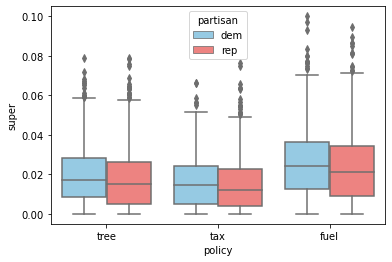

In [29]:
# Create box-plot of positive word count by 
import seaborn as sns
sns.boxplot(x="policy", y="super", hue="partisan", data=df, palette=("#89CFF0","#ff726f")) 

In [27]:
df

,prompt,text,id,dem,rep,super,token_length,valence,dem_count,rep_count,super_count,partisan,policy
0,Write a 200-word persuasive essay ### Persuade...,\n\nTrees are vital for the environment and t...,0.0,0.004202,0.000000,0.012605,238.0,0.487395,1.0,0.0,3.0,rep,fuel
1,Write a 200-word persuasive essay ### Persuade...,\n\nThe pressing environmental crisis of clim...,0.0,0.000000,0.000000,0.004405,227.0,0.497797,0.0,0.0,1.0,rep,fuel
2,Write a 200-word persuasive essay ### Persuade...,\n\nPlanting trees to offset carbon emissions ...,0.0,0.004149,0.000000,0.008299,241.0,0.435685,1.0,0.0,2.0,rep,fuel
3,Write a 200-word persuasive essay ### Persuade...,"\n\nRegardless of political affiliation, every...",0.0,0.000000,0.000000,0.023041,217.0,0.423963,0.0,0.0,5.0,rep,fuel
4,Write a 200-word persuasive essay ### Persuade...,\n\nClimate change is one of the most pressing...,0.0,0.005556,0.000000,0.011111,180.0,0.466667,1.0,0.0,2.0,rep,fuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,Write a 200-word persuasive essay ### Persuade...,\n\nThe importance of supporting tougher fuel ...,0.0,0.000000,0.000000,0.039823,226.0,0.469027,0.0,0.0,9.0,rep,fuel
5996,Write a 200-word persuasive essay ### Persuade...,"\n\nAs a Republican, one of your chief priorit...",0.0,0.000000,0.004292,0.047210,233.0,0.381974,0.0,1.0,11.0,rep,fuel
5997,Write a 200-word persuasive essay ### Persuade...,"\n\nIn recent years, the debate regarding toug...",0.0,0.000000,0.004098,0.016393,244.0,0.413934,0.0,1.0,4.0,rep,fuel
5998,Write a 200-word persuasive essay ### Persuade...,\n\nClimate change is one of the greatest thre...,0.0,0.000000,0.000000,0.013761,218.0,0.431193,0.0,0.0,3.0,rep,fuel


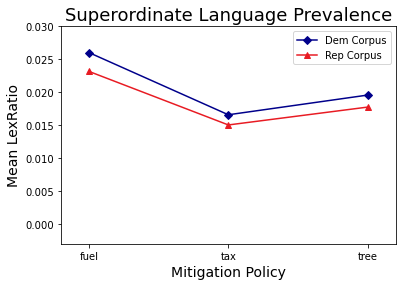

In [53]:
fig = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['super'], 
    colors=['#00008B','#E81B23',], markers=["D", "^"])
plt.title("Superordinate Language Prevalence", fontsize=18)
plt.ylabel("Mean LexRatio", fontsize=14)
plt.xlabel("Mitigation Policy", fontsize=14)
plt.legend(["Dem Corpus", "Rep Corpus"])
plt.ylim(-0.003, 0.03)
plt.savefig('super_interactionplot.png', dpi=600)

plt.show()

In [230]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('super_count ~ C(partisan) + C(policy) + C(partisan):C(policy)', data=df).fit()
super_anova_table = sm.stats.anova_lm(model, typ=2)
super_anova_table

,sum_sq,df,F,PR(>F)
C(partisan),303.750,1.0,23.976116,1.000952e-06
C(policy),3748.396,2.0,147.937408,1.936357e-63
C(partisan):C(policy),24.256,2.0,0.957308,3.839837e-01
Residual,75937.134,5994.0,NaN,NaN


#### Valence ANOVA

In [272]:
model = ols('valence ~ C(partisan) + C(policy) + C(partisan):C(policy)', data=df).fit()
valence_anova_table = sm.stats.anova_lm(model, typ=2)
valence_anova_table

,sum_sq,df,F,PR(>F)
C(partisan),0.000060,1.0,0.063297,0.801367
C(policy),2.283275,2.0,1196.976513,0.000000
C(partisan):C(policy),0.010326,2.0,5.413431,0.004478
Residual,5.716884,5994.0,NaN,NaN


<AxesSubplot:xlabel='policy', ylabel='valence'>

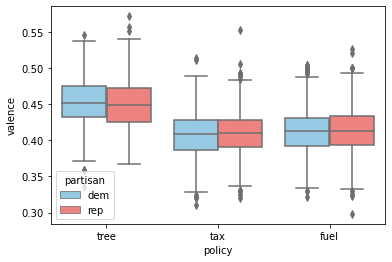

In [228]:
sns.boxplot(x="policy", y="valence", hue="partisan", data=df, palette=("#89CFF0","#ff726f")) 

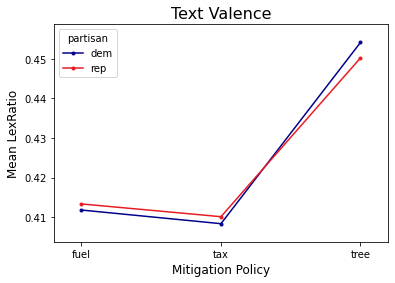

In [41]:
fig = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['valence'], 
    colors=['#00008B','#E81B23',])
plt.title("Text Valence", fontsize=16)
plt.ylabel("Mean LexRatio", fontsize=12)
plt.xlabel("Mitigation Policy", fontsize=12)
plt.savefig('valence_interactionplot.png', dpi=600)
plt.show()

#### Dem text indicators

In [273]:
model = ols('dem ~ C(partisan) + C(policy) + C(partisan):C(policy)', data=df).fit()
dem_anova_table = sm.stats.anova_lm(model, typ=2)
dem_anova_table

,sum_sq,df,F,PR(>F)
C(partisan),0.000268,1.0,196.872854,4.969765e-44
C(policy),0.000024,2.0,8.621513,1.824315e-04
C(partisan):C(policy),0.000021,2.0,7.795666,4.157009e-04
Residual,0.008171,5994.0,NaN,NaN


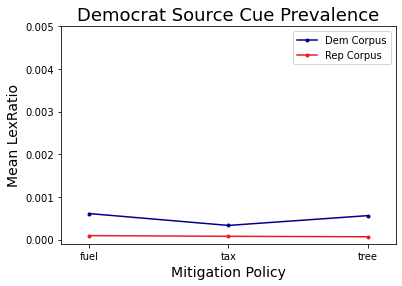

In [51]:
fig = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['dem'], 
    colors=['#00008B','#E81B23',])
plt.title("Democrat Source Cue Prevalence", fontsize=18)
plt.ylabel("Mean LexRatio", fontsize=14)
plt.xlabel("Mitigation Policy", fontsize=14)
plt.legend(["Dem Corpus", "Rep Corpus"])
plt.ylim(-0.0001, 0.005)
plt.savefig('dem_interactionplot.png', dpi=600)

plt.show()

#### Rep Text Indicators

In [274]:
model = ols('rep ~ C(partisan) + C(policy) + C(partisan):C(policy)', data=df).fit()
rep_anova_table = sm.stats.anova_lm(model, typ=2)
rep_anova_table

,sum_sq,df,F,PR(>F)
C(partisan),0.007953,1.0,1125.723124,2.502274e-226
C(policy),0.000088,2.0,6.233948,1.974434e-03
C(partisan):C(policy),0.000082,2.0,5.825676,2.967541e-03
Residual,0.042349,5994.0,NaN,NaN


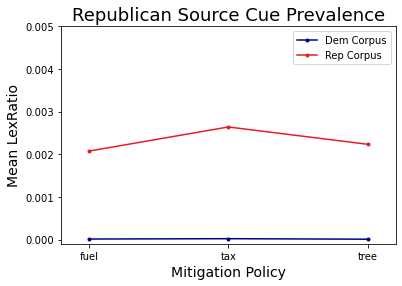

In [52]:
fig = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['rep'], 
    colors=['#00008B','#E81B23',])
plt.title("Republican Source Cue Prevalence", fontsize=18)
plt.ylabel("Mean LexRatio", fontsize=14)
plt.xlabel("Mitigation Policy", fontsize=14)
plt.legend(["Dem Corpus", "Rep Corpus"])
plt.ylim(-0.0001, 0.005)
plt.savefig('rep_interactionplot.png', dpi=600)

plt.show()

In [276]:
# save tables to csv
super_anova_table.to_csv('super_anova.csv', index=True)
valence_anova_table.to_csv('valence_anova.csv', index=True)
dem_anova_table.to_csv('dem_anova.csv', index=True)
rep_anova_table.to_csv('rep_anova.csv', index=True)

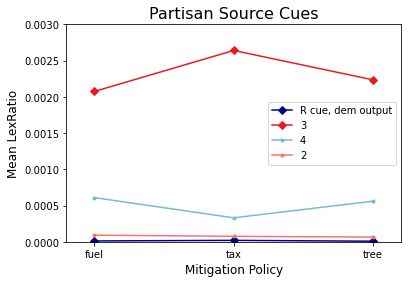

In [155]:
fig, ax = plt.subplots()

# Row1
sns.boxplot(x="policy", y="dem", hue="partisan", data=df, palette=("#89CFF0","#ff726f"), ax=ax[0,1] 

rep_plot = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['rep'], 
    colors=['#00008B','#E81B23',], ax=ax, markers=["D", "D"],
    ms=5,)
plt.title("Republican Source Cues", fontsize=16)
plt.ylabel("Mean LexRatio", fontsize=12)
plt.xlabel("Mitigation Policy", fontsize=12)
plt.ylim([0, 0.02])
dem_plot = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['dem'], 
    colors=['#72bcd4','#ff726f',], ax=ax)
plt.title("Partisan Source Cues", fontsize=16)
plt.ylabel("Mean LexRatio", fontsize=12)
plt.xlabel("Mitigation Policy", fontsize=12)
plt.ylim([0, 0.003])
plt.legend(["R cue, dem output","3","4","2"])
plt.show()



# s.plot_spectro(xaxis=x, yaxis=y, ax=ax) # <--- pass ax=ax here
# o1.plot_spectro(xaxis=x, yaxis=y,  color='b', ax=ax) # <--- pass ax=ax here

# plt.xlim(-6,2)
# plt.ylim(-2.5,2.5)

# plt.legend()
# plt.show()

Text(0.5, 1.0, 'Combined Source Cue Indicators')

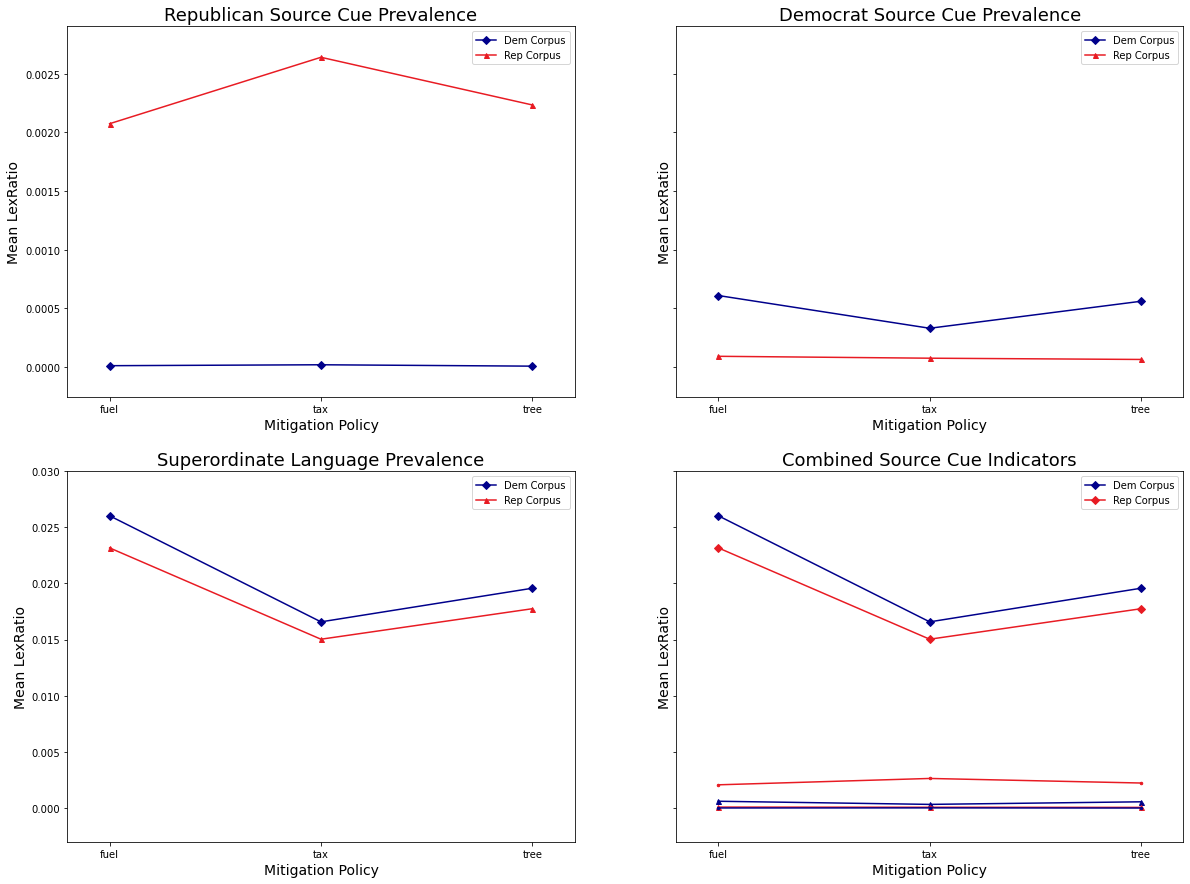

In [200]:
import matplotlib.pyplot as plt
%matplotlib inline

figs, ax = plt.subplots(
    nrows=2,
    ncols=2,
    figsize=(20, 15),
    sharey="row"
)
# Rep interaction plot
rep_plot = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['rep'], 
    colors=['#00008B','#E81B23',], ax=ax[0,0], markers=["D", "^"],
    ms=5,)
ax[0,0].set_ylabel("Mean LexRatio", fontsize=14)
ax[0,0].set_xlabel("Mitigation Policy", fontsize=14)
#dem interaction plot
dem_plot = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['dem'], 
    colors=['#00008B','#E81B23',], ax=ax[0,1], markers=["D", "^"],
    ms=5,)
plt.ylabel("Mean LexRatio", fontsize=14)
plt.xlabel("Mitigation Policy", fontsize=14)
# super interaction plot
super_plot = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['super'], 
    colors=['#00008B','#E81B23',], ax=ax[1,0], markers=["D", "^"],
    ms=5,)
plt.title("Superordinate Language", fontsize=16)
plt.ylabel("Mean LexRatio", fontsize=12)
plt.xlabel("Mitigation Policy", fontsize=12)
ax[1,0].set_ylim(-0.003, 0.03)

combined1 = super_plot = interaction_plot(x=df['policy'], trace=df['partisan'], response=df['super'], 
    colors=['#00008B','#E81B23',], ax=ax[1,1], markers=["D", "D"],
    ms=5,)
interaction_plot(x=df['policy'], trace=df['partisan'], response=df['dem'], 
    colors=['#00008B','#E81B23',], ax=ax[1,1], markers=["^", "^"],
    ms=5,)
interaction_plot(x=df['policy'], trace=df['partisan'], response=df['rep'], 
    colors=['#00008B','#E81B23',], ax=ax[1,1], markers=[".", "."],
    ms=5,)

# plt.legend(["R cue, dem output","3","4","2"])
ax[0,0].set_title("Republican Source Cue Prevalence", fontsize=18)
ax[0,0].legend(["Dem Corpus", "Rep Corpus"])
ax[0,0].set_ylabel("Mean LexRatio", fontsize=14)
ax[0,0].set_xlabel("Mitigation Policy", fontsize=14)

ax[0,1].set_title("Democrat Source Cue Prevalence", fontsize=18)
ax[0,1].set_ylabel("Mean LexRatio", fontsize=14)
ax[0,1].set_xlabel("Mitigation Policy", fontsize=14)
ax[0,1].legend(["Dem Corpus", "Rep Corpus"])

ax[1,0].set_ylabel("Mean LexRatio", fontsize=14)
ax[1,0].set_xlabel("Mitigation Policy", fontsize=14)
ax[1,0].legend(["Dem Corpus", "Rep Corpus"])
ax[1,0].set_title("Superordinate Language Prevalence", fontsize=18)

ax[1,1].set_ylabel("Mean LexRatio", fontsize=14)
ax[1,1].set_xlabel("Mitigation Policy", fontsize=14)
ax[1,1].legend(["Dem Corpus", "Rep Corpus"])
ax[1,1].set_title("Combined Source Cue Indicators", fontsize=18)

In [203]:
figs.savefig('interaction_plots.png', dpi=600)


In [164]:
df

,prompt,text,id,dem,rep,super,neg,pos,token_length,partisan,dem_count,rep_count,super_count,neg_count,pos_count,valence,policy
0,dem-tree,\n\nTrees are vital for the environment and t...,0,0.004202,0.000000,0.012605,0.016807,0.121849,238,dem,1.0,0.0,3.0,4.0,29,0.487395,tree
1,dem-tree,\n\nThe pressing environmental crisis of clim...,1,0.000000,0.000000,0.004405,0.035242,0.114537,227,dem,0.0,0.0,1.0,8.0,26,0.497797,tree
2,dem-tree,\n\nPlanting trees to offset carbon emissions ...,2,0.004149,0.000000,0.008299,0.016598,0.070539,241,dem,1.0,0.0,2.0,4.0,17,0.435685,tree
3,dem-tree,"\n\nRegardless of political affiliation, every...",3,0.000000,0.000000,0.023041,0.009217,0.110599,217,dem,0.0,0.0,5.0,2.0,24,0.423963,tree
4,dem-tree,\n\nClimate change is one of the most pressing...,4,0.005556,0.000000,0.011111,0.027778,0.072222,180,dem,1.0,0.0,2.0,5.0,13,0.466667,tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,rep-fuel,\n\nThe importance of supporting tougher fuel ...,5995,0.000000,0.000000,0.039823,0.026549,0.132743,226,rep,0.0,0.0,9.0,6.0,30,0.469027,fuel
5996,rep-fuel,"\n\nAs a Republican, one of your chief priorit...",5996,0.000000,0.004292,0.047210,0.051502,0.068670,233,rep,0.0,1.0,11.0,12.0,16,0.381974,fuel
5997,rep-fuel,"\n\nIn recent years, the debate regarding toug...",5997,0.000000,0.004098,0.016393,0.020492,0.098361,244,rep,0.0,1.0,4.0,5.0,24,0.413934,fuel
5998,rep-fuel,\n\nClimate change is one of the greatest thre...,5998,0.000000,0.000000,0.013761,0.009174,0.096330,218,rep,0.0,0.0,3.0,2.0,21,0.431193,fuel


### Testing Assumptions

In [59]:
df

,prompt,text,id,dem,rep,super,neg,pos,token_length,partisan,dem_count,rep_count,super_count,neg_count,pos_count,valence,policy
0,dem-tree,\n\nTrees are vital for the environment and t...,0,0.004202,0.000000,0.012605,0.016807,0.121849,238,dem,1.0,0.0,3.0,4.0,29,0.487395,tree
1,dem-tree,\n\nThe pressing environmental crisis of clim...,1,0.000000,0.000000,0.004405,0.035242,0.114537,227,dem,0.0,0.0,1.0,8.0,26,0.497797,tree
2,dem-tree,\n\nPlanting trees to offset carbon emissions ...,2,0.004149,0.000000,0.008299,0.016598,0.070539,241,dem,1.0,0.0,2.0,4.0,17,0.435685,tree
3,dem-tree,"\n\nRegardless of political affiliation, every...",3,0.000000,0.000000,0.023041,0.009217,0.110599,217,dem,0.0,0.0,5.0,2.0,24,0.423963,tree
4,dem-tree,\n\nClimate change is one of the most pressing...,4,0.005556,0.000000,0.011111,0.027778,0.072222,180,dem,1.0,0.0,2.0,5.0,13,0.466667,tree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,rep-fuel,\n\nThe importance of supporting tougher fuel ...,5995,0.000000,0.000000,0.039823,0.026549,0.132743,226,rep,0.0,0.0,9.0,6.0,30,0.469027,fuel
5996,rep-fuel,"\n\nAs a Republican, one of your chief priorit...",5996,0.000000,0.004292,0.047210,0.051502,0.068670,233,rep,0.0,1.0,11.0,12.0,16,0.381974,fuel
5997,rep-fuel,"\n\nIn recent years, the debate regarding toug...",5997,0.000000,0.004098,0.016393,0.020492,0.098361,244,rep,0.0,1.0,4.0,5.0,24,0.413934,fuel
5998,rep-fuel,\n\nClimate change is one of the greatest thre...,5998,0.000000,0.000000,0.013761,0.009174,0.096330,218,rep,0.0,0.0,3.0,2.0,21,0.431193,fuel


In [98]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='valence', anova_model='valence~C(partisan)+C(policy)+C(partisan):C(policy)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(partisan),1.0,0.000060,0.000060,0.063297,0.801367
C(policy),2.0,2.283275,1.141638,1196.976513,0.000000
C(partisan):C(policy),2.0,0.010326,0.005163,5.413431,0.004478
Residual,5994.0,5.716884,0.000954,NaN,NaN


In [77]:
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=df, res_var='rep', xfac_var='policy', anova_model='dem~C(policy)+C(partisan)+C(policy):C(partisan)')
res.tukey_summary

/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,tree,tax,0.000209,0.000122,0.000296,8.007402,0.001000
1,tree,fuel,0.000078,-0.000009,0.000164,2.984666,0.087737
2,tax,fuel,0.000287,0.000200,0.000374,10.992068,0.001000


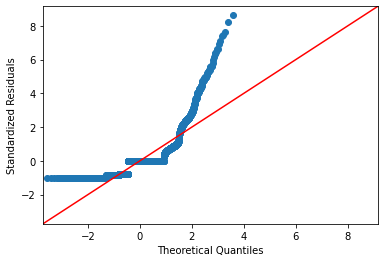

In [96]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
# res.anova_std_residuals are standardized residuals obtained from two-way ANOVA (check above)
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

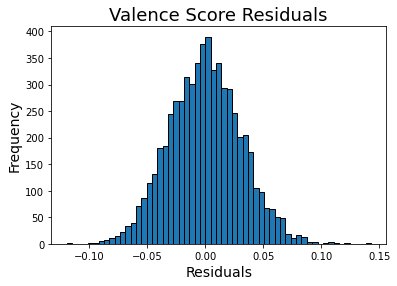

In [99]:
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals", fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title("Valence Score Residuals", fontsize=18)
plt.savefig('residuals_valence.png', dpi=600)

plt.show()

In [100]:
# Shapiro-Wilk test
import scipy.stats as stats
w, pvalue = stats.shapiro(res.anova_model_out.resid)
print(w, pvalue)

0.9993612766265869 0.030452212318778038


/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [91]:
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
# for main effect Genotype
res.tukey_hsd(df=df, res_var='valence', xfac_var='policy', anova_model='valence~C(policy)+C(partisan)+C(policy):C(partisan)')
res.tukey_summary

/Users/samgriffin/opt/anaconda3/lib/python3.9/site-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,tree,tax,0.042948,0.040659,0.045238,62.192377,0.001000
1,tree,fuel,0.039614,0.037324,0.041903,57.364244,0.001000
2,tax,fuel,0.003334,0.001045,0.005624,4.828133,0.001863


In [94]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df, res_var='rep', xfac_var=['partisan', 'policy'])
res.levene_summary

,Parameter,Value
0,Test statistics (W),229.9685
1,Degrees of freedom (Df),5.0000
2,p value,0.0000


In [84]:
dem = df[df["partisan"] == "dem"]
rep = df[df["partisan"] == "rep"]

In [87]:
dem["valence"].mean()

0.4247614318941299

In [88]:
rep["valence"].mean()

0.42456081482504093

In [89]:
ttest_ind(dem["valence"], rep["valence"])

Ttest_indResult(statistic=0.21261177502025957, pvalue=0.8316370112708598)